ERSIP Lab Sessions    
Lab 1: Introduction  
20-09-2025

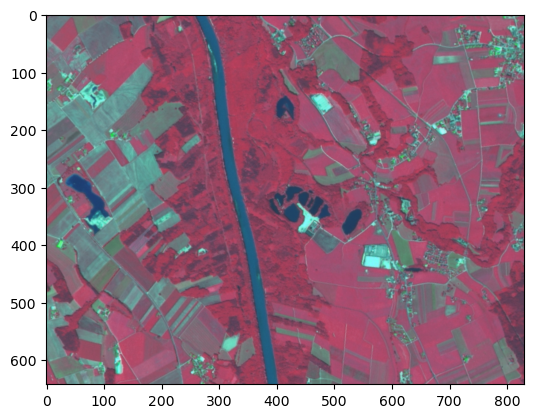

In [29]:
# load image
import rasterio
import numpy as np

src = rasterio.open(r"Data\spot2005_pansharpened_utm33_subset_NIRRGMIR.tif")
img = src.read([1,2,3])  # read RGB bands
rgb = np.transpose(img, (1, 2, 0))

# display image
from matplotlib import pyplot as plt
plt.imshow(rgb)
plt.show()

In [ ]:
# Properties
print("Dimensions:", rgb.shape)
print("# bands:", src.count)
print("Resolution:", src.res)
print("Data type:", src.dtypes[0])


Dimensions: (642, 830, 3)
# bands: 4
Resolution: (5.29309099999997, 5.29309099999973)
Data type: uint8


Dimension : (161, 208)
~ resolution: (21.17236399999988, 21.17236399999892)
Data type: uint8


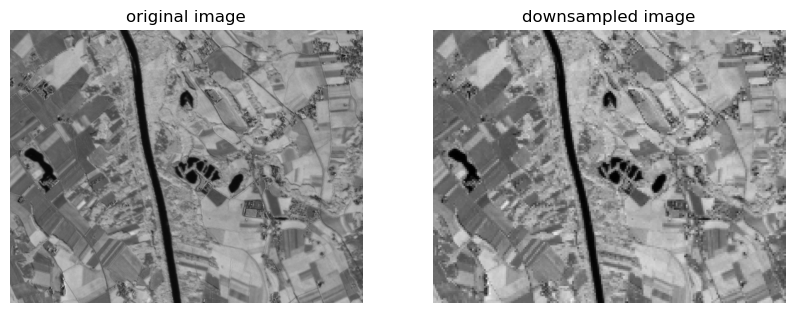

In [ ]:
# Original image shape
array = src.read(1)
[m, n] = array.shape

# Downsampling rate 
dsr = 4

# Reduce spatial resolution by selecting every dsr-th pixel in both rows and columns
src2 = array[::dsr, ::dsr]

# downsample image properties
print('Dimension :', src2.shape)
print('~ resolution:', tuple(res*dsr for res in src.res)) #original resoultion*downsampling rate
print('Data type:', src.dtypes[0])

# Display the downsampled image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(array, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off")

axes[1].imshow(src2, cmap='gray')
axes[1].set_title("downsampled image")
axes[1].axis("off")
plt.show()


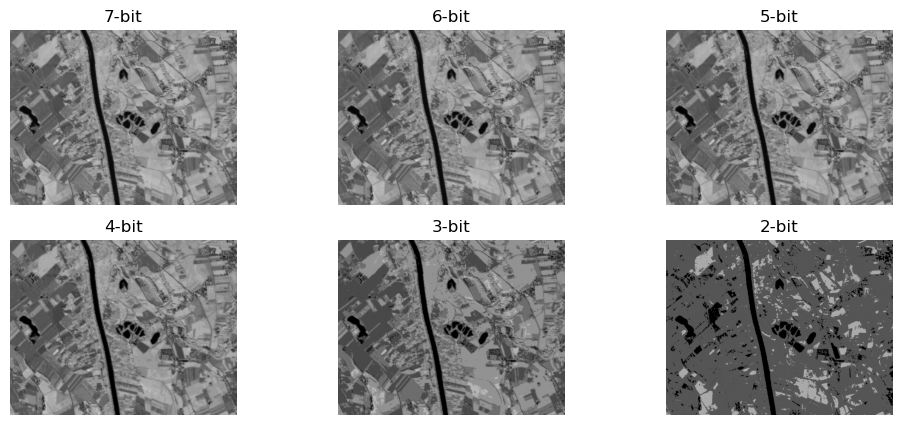

In [17]:
# Reduce Radiometric Resolution
# Normalize/rescale and multiply by maximum value for n-bit (max_val = 2**n_bit - 1 )
src_7bit = ((array - array.min()) / (array.max() - array.min()) * 127).astype(np.uint8)
src_6bit = ((array - array.min()) / (array.max() - array.min()) * 63).astype(np.uint8)
src_5bit = ((array - array.min()) / (array.max() - array.min()) * 31).astype(np.uint8)
src_4bit = ((array - array.min()) / (array.max() - array.min()) * 15).astype(np.uint8) # 4-bit (0-15)
src_3bit = ((array - array.min()) / (array.max() - array.min()) * 7).astype(np.uint8)
src_2bit = ((array - array.min()) / (array.max() - array.min()) * 3).astype(np.uint8) # 2-bit (0-3)


# Display radiometric reduced image
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = axes.flatten()

axes[0].imshow(src_7bit, cmap='gray')
axes[0].set_title("7-bit")
axes[0].axis("off")

axes[1].imshow(src_6bit, cmap='gray')
axes[1].set_title("6-bit")
axes[1].axis("off")

axes[2].imshow(src_5bit, cmap='gray')
axes[2].set_title("5-bit")
axes[2].axis("off")

axes[3].imshow(src_4bit, cmap='gray')
axes[3].set_title("4-bit")
axes[3].axis("off")

axes[4].imshow(src_3bit, cmap='gray')
axes[4].set_title("3-bit")
axes[4].axis("off")

axes[5].imshow(src_2bit, cmap='gray')
axes[5].set_title("2-bit")
axes[5].axis("off")

plt.show()


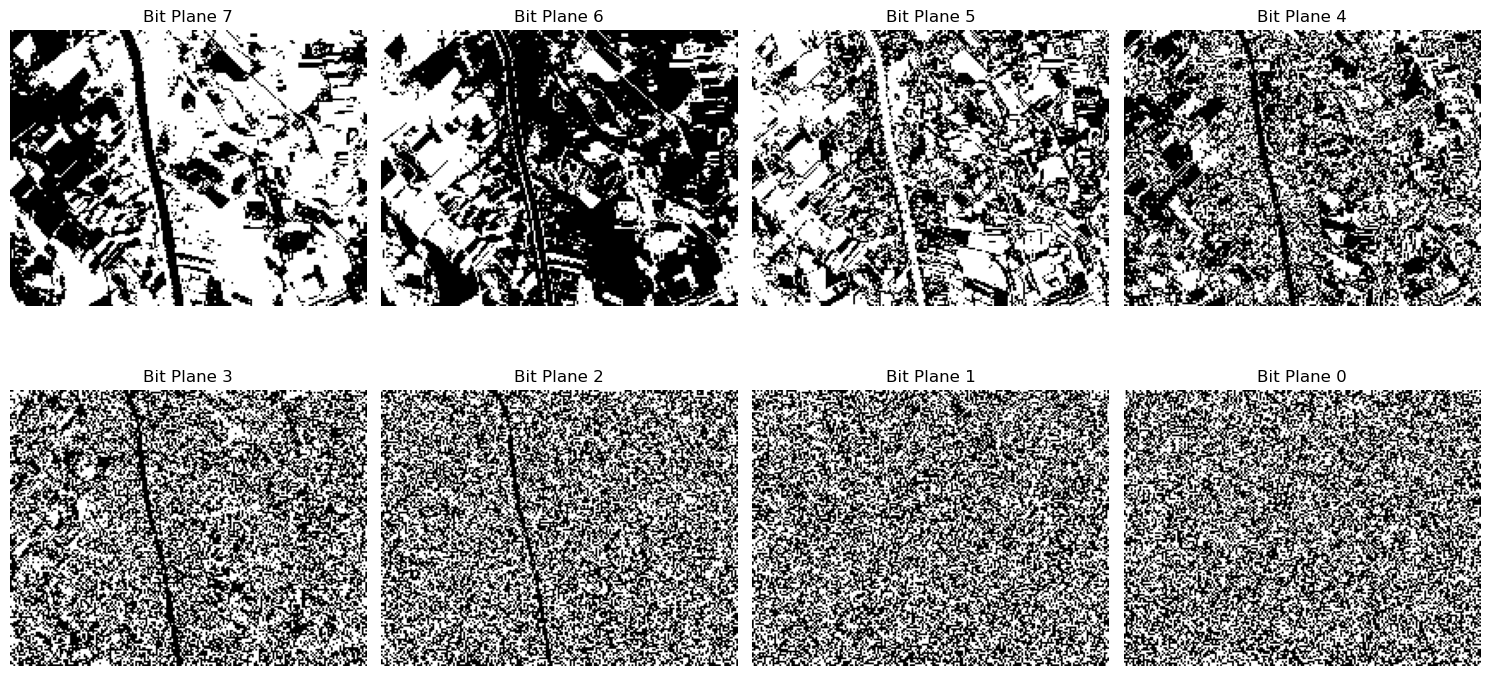

In [21]:
# Bit plane slicing
# Extract each bit plane (using the 8bit image)
# >> i bitwise right shift by i positions; bitwise & 1 isolates the least signinficant bit (LSB) after the shift.
bit_planes = [(src2 >> i) & 1 for i in range(8)] 

# Display bit planes    
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

# Display bit planes 
for i, ax in enumerate(axes.flatten()):
    ax.imshow(bit_planes[7-i], cmap='gray')
    ax.set_title(f"Bit Plane {7-i}")
    ax.axis("off")

plt.tight_layout()
plt.show()
